# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_excel('geo_comment.xlsx')

In [4]:
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [5]:
data.shape

(70382, 6)

In [7]:
data.comment_class.value_counts()

-1    58552
 1    11830
Name: comment_class, dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler

In [15]:
data_district = data[['x', 'y']].sample(40000)

In [6]:
scaler = StandardScaler()

In [16]:
X_scaled = scaler.fit_transform(data_district)

In [17]:
model = DBSCAN()

prediction = model.fit_predict(X_scaled)

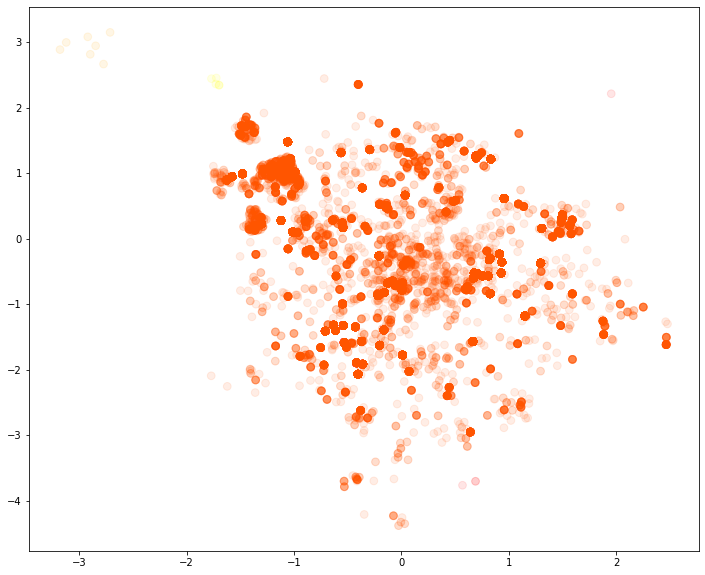

In [18]:
plt.figure(figsize=(12,10))
clusters = model.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=0.1)

In [4]:
data_vote = data[['comment_class', 'multiplier']].sample(10000)

In [7]:
X_scaled_vote = scaler.fit_transform(data_vote)

In [14]:
model_vote = DBSCAN()
prediction_vote = model_vote.fit_predict(data_vote)


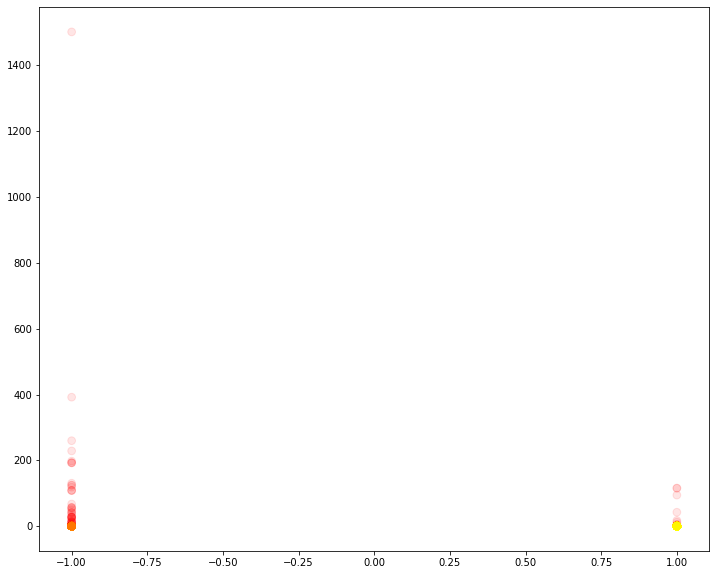

In [16]:
plt.figure(figsize=(12,10))
clusters_vote = model_vote.fit_predict(data_vote)
plt.scatter(data_vote.comment_class, data_vote.multiplier, c=clusters_vote, cmap='autumn', s=60, alpha=0.1)

In [17]:
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [18]:
data_scaled = scaler.fit_transform(data[['x', 'y', 'comment_class', 'multiplier']])

In [21]:
from sklearn.cluster import KMeans

In [22]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

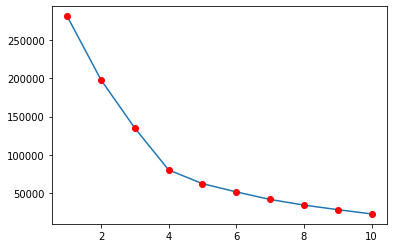

In [23]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

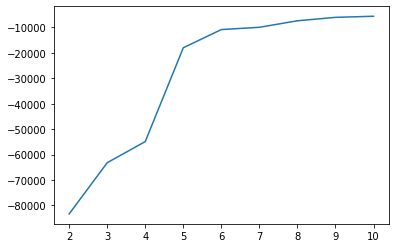

In [24]:
diff = np.diff(k_inertia)

plt.plot(ks[1:], diff)

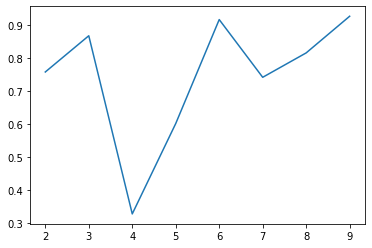

In [25]:
diff_r = diff[1:] / diff[:-1]

plt.plot(ks[1:-1], diff_r)

In [26]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

4